# Movie Recommendation System

In [1]:
import pandas as pd

## Load Data

Link: https://grouplens.org/datasets/movielens/

In [2]:
df_links=pd.read_csv('Data_folder/links.csv') 

In [3]:
df_movies=pd.read_csv('Data_folder/movies.csv') 

In [4]:
df_ratings=pd.read_csv('Data_folder/ratings.csv') 

In [5]:
# This dataset contains the Id's of the movies
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df_links.shape

(62423, 3)

Observation of df_links dataset:- This contains the Id's of more than 60 thousands movies

In [98]:
# This dataset has title and genres of the movies 
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [99]:
df_movies.shape

(62423, 3)

Observations: df_links dataset and df_movies dataset have same number of rows 62423

## Merging the df_links dataset and df_movies dataset on movieId

In [8]:
df=df_movies.merge(df_links,on='movieId')
df

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
62418,209157,We (2018),Drama,6671244,499546.0
62419,209159,Window of the Soul (2001),Documentary,297986,63407.0
62420,209163,Bad Poems (2018),Comedy|Drama,6755366,553036.0
62421,209169,A Girl Thing (2001),(no genres listed),249603,162892.0


In [9]:
# We need only 'imdbId' instead of 'tmdbId' so drop tmdbId 
df.drop('tmdbId',axis=1,inplace=True)              # run once therwise it will show errors
df.head()

,movieId,title,genres,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,113228
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885
4,5,Father of the Bride Part II (1995),Comedy,113041


In [10]:
# This dataset has 'rating' of the user on the movie 
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [11]:
df_ratings.shape

(25000095, 4)

Observation of df_ratings dataset:- This datasets has 25 millions ratings of different users on the different movies

In [12]:
# Droping the 'timestamp' column because we don't need of that feature
df_ratings.drop('timestamp',axis=1,inplace=True)

## Droping the followings:-
### Drop those users that has given less than 100 ratings on the movies and 
### Drop those movies that has given less than 100 ratings by the users

In [13]:
df_rating_ge_100=df_ratings.groupby('userId')['rating'].count()>100
df_rating_ge_100=df_rating_ge_100.reset_index().rename(columns={'rating': 'Count>100'})

In [14]:
# Uncomment the following one by one to see the intermediate steps

# df_ratings.groupby('userId')['rating'].count()
# df_ratings.groupby('userId')['rating'].count()>100
# df_rating_ge_100
# df_rating_ge_100['Count>100'].sum()

In [15]:
# Extracting those userId's that has given more than 100 ratings
df_movie_rating_userId=df_rating_ge_100[df_rating_ge_100['Count>100']==True]['userId'].reset_index().drop('index',axis=1)
df_movie_rating_userId

,userId
0,2
1,3
2,4
3,5
4,8
...,...
63097,162533
63098,162534
63099,162537
63100,162538


In [16]:
# Now, merging these extracted userId's with the df_ratings
df_movie_rating_userId=df_movie_rating_userId.merge(df_ratings,on='userId')

In [17]:
df_movie_rating_userId

,userId,movieId,rating
0,2,1,3.5
1,2,62,0.5
2,2,110,5.0
3,2,150,4.0
4,2,151,4.5
...,...,...,...
20316204,162541,50872,4.5
20316205,162541,55768,2.5
20316206,162541,56176,2.0
20316207,162541,58559,4.0


In [18]:
# Taking the movieId's that has more than 100 rating counts        
df_movie_rating_ge_100=df_movie_rating_userId.groupby('movieId')['rating'].count()>100

In [19]:
df_movie_rating_ge_100=df_movie_rating_ge_100.reset_index().rename(columns={'rating': 'Count>100'})

In [20]:
# Uncomment the following one by one to see the intermediate steps 

# df_movie_rating_userId.groupby('movieId')['rating'].count()
# df_movie_rating_ge_100
# df_movie_rating_ge_100.sum()

In [21]:
df_movie_rating_movieId=df_movie_rating_ge_100[df_movie_rating_ge_100['Count>100']==True]['movieId'].reset_index().drop('index',axis=1)

In [22]:
df_movie_rating_movieId

,movieId
0,1
1,2
2,3
3,4
4,5
...,...
10063,203519
10064,204352
10065,204542
10066,204698


Note:- Here dataset df_movie_rating_movieId, is the extracted both (by userId and movieId), because the extraction (movie rating count>100) is applied to the extracted dataset (userId rating count>100)

In [23]:
# Now, merging these extracted movieId's with the extracted userId's  (Here df_movie_rating_movieId having both extractions)
df_movie_rating_userId.merge(df_movie_rating_movieId,on='movieId')

,userId,movieId,rating
0,2,1,3.5
1,3,1,4.0
2,4,1,3.0
3,5,1,4.0
4,8,1,4.0
...,...,...,...
19761865,158028,5416,3.0
19761866,160101,5416,2.0
19761867,160897,5416,1.0
19761868,161091,5416,4.5


In [24]:
df_rate=df_movie_rating_userId.merge(df_movie_rating_movieId,on='movieId')

In [25]:
# Taking average ratings of each movies
df_average_rate=df_rate.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'AverageRate'})
df_average_rate

,movieId,AverageRate
0,1,3.866106
1,2,3.166612
2,3,3.024514
3,4,2.768927
4,5,2.932645
...,...,...
10063,203519,3.040000
10064,204352,3.397143
10065,204542,3.123529
10066,204698,4.035232


In [26]:
# Now merging the datasets movies (df) with the extracted dataset df_movie_rating_movieId
df.merge(df_movie_rating_movieId,on='movieId')

,movieId,title,genres,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,113228
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885
4,5,Father of the Bride Part II (1995),Comedy,113041
...,...,...,...,...
10063,203519,Fast & Furious Presents: Hobbs & Shaw (2019),Action,6806448
10064,204352,Ad Astra (2019),Adventure|Drama|Mystery|Sci-Fi|Thriller,2935510
10065,204542,It: Chapter Two (2019),Horror,7349950
10066,204698,Joker (2019),Crime|Drama|Thriller,7286456


In [27]:
df_rm = df.merge(df_movie_rating_movieId,on='movieId')

In [28]:
# Now taking out the imdbId 
imdbID=df_rm['imdbId'].reset_index().drop('index',axis=1)

In [29]:
imdbID

,imdbId
0,114709
1,113497
2,113228
3,114885
4,113041
...,...
10063,6806448
10064,2935510
10065,7349950
10066,7286456


#### We need more feature for the recommendation system (e.g. cast, crew, plot, etc.) 
So imdbId have been taken from the dataset, to fetch the features with the help of API

In [30]:
# Uncomment this for downloading the csv file imdbID, so that it fetch the attributes from API (I used google colab to fetch the features)

# compression_opts = dict(method='zip', archive_name='out_id.csv')  
# imdbID.to_csv('out_id.zip', compression=compression_opts)  

Google colab link
https://colab.research.google.com/drive/11uIRcLskFcQu_vxJuOmlCmAUPZB9ZbtC?usp=sharing

In [31]:
df_rm[df_rm['imdbId']==118114]

,movieId,title,genres,imdbId
623,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,118114


In [32]:
df_rm.drop(622,inplace=True) # Droping because we are not able to fetch the attributes via API

In [33]:
df_rm.drop(623,inplace=True) # Droping because we are not able to fetch the attributes via API

In [34]:
df_rm[df_rm['imdbId']==118114]

,movieId,title,genres,imdbId


In [35]:
df1=pd.read_csv('Attribute_folder/dt_first.csv')
df3=pd.read_csv('Attribute_folder/dt_first100_200.csv')
df4=pd.read_csv('Attribute_folder/dt_first200_300.csv')
df2=pd.read_csv('Attribute_folder/dt_first50_100.csv')
df5=pd.read_csv('Attribute_folder/dt_first300_400.csv')
df6=pd.read_csv('Attribute_folder/dt_first400_600.csv')
df7=pd.read_csv('Attribute_folder/dt_first600_622.csv')
df8=pd.read_csv('Attribute_folder/dt_first624_900.csv')
df9=pd.read_csv('Attribute_folder/dt_first900_1200.csv')
df10=pd.read_csv('Attribute_folder/dt_first1200_1500.csv')
df11=pd.read_csv('Attribute_folder/dt_first1500_1700.csv')
df12=pd.read_csv('Attribute_folder/dt1700_2000.csv')
df13=pd.read_csv('Attribute_folder/dt_first2000_2300.csv')
df14=pd.read_csv('Attribute_folder/dt_first2300_2500.csv')
df15=pd.read_csv('Attribute_folder/dt2500_2800.csv')

df16=pd.read_csv('Attribute_folder/dt2800_3000.csv')
df17=pd.read_csv('Attribute_folder/dt3000_3300.csv')
df18=pd.read_csv('Attribute_folder/dt3300_3500.csv')
df19=pd.read_csv('Attribute_folder/dt3500_3700.csv')
df20=pd.read_csv('Attribute_folder/dt3700_4000.csv')
df21=pd.read_csv('Attribute_folder/dt4000_4500.csv')
df22=pd.read_csv('Attribute_folder/dt4500_5000.csv')
df23=pd.read_csv('Attribute_folder/dt5000_5500.csv')
df24=pd.read_csv('Attribute_folder/dt5500_6000.csv')
df25=pd.read_csv('Attribute_folder/dt6000_7000.csv')

df26=pd.read_csv('Attribute_folder/dt7000_8000.csv')
df27=pd.read_csv('Attribute_folder/dt8000_8300.csv')
df28=pd.read_csv('Attribute_folder/dt8300_9000.csv')
df29=pd.read_csv('Attribute_folder/dt9000_10068.csv')

#### The above datasets, from df1 to df29 have come from the fetching the features using the API. 
#### Here there are huge number of csv files, the reason is when I had put whole the data (imdbId) to fetch the attributes then some kinds of error happened due to the API and the environment issues. 
#### These csv files can be combined to a single csv file, but I put these as it is, to explain the problems that I had faced on fetching the features.

In [36]:
# Observing the one of the datasets
df13.head(10)

,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,92112,Hard rock idol Sammi Curr burns to death in a ...,"['Marc Price', 'Tony Fields', 'Lisa Orgolini',...","['Devorah S.F. Arlook', 'Page Lynn Campbell', ...",['Charles Martin Smith'],['United States'],['English'],['De Laurentiis Entertainment Group (DEG)']
1,90917,Paul Conway and his mother Jeannie Conway trav...,"['Matthew Labyorteaux', 'Kristy Swanson', 'Mic...","['Ruth Ellen Daniels', 'William H. Faeth', 'Pa...",['Wes Craven'],['United States'],['English'],"['Warner Bros.', 'Pan Arts', 'Layton']"
2,91605,14. century Franciscan monk William of Baskerv...,"['Sean Connery', 'Christian Slater', 'Helmut Q...","['Frans J. Afman', 'Daniele Alexandre-Bidon', ...",['Jean-Jacques Annaud'],"['West Germany', 'Italy', 'France']","['English', 'Italian', 'Latin', 'German']","['Constantin Film', 'Cristaldifilm', 'Les Film..."
3,91306,"Terry works for a bank, and uses computers to ...","['Whoopi Goldberg', 'Stephen Collins', 'John W...","['Anthony Blake Brand', 'Patti Calhoun', 'Jane...",['Penny Marshall'],['United States'],['English'],"['Lawrence Gordon Productions', 'Silver Pictur..."
4,91738,Peggy Sue Bodell (Turner) attends her 25-year ...,"['Kathleen Turner', 'Nicolas Cage', 'Barry Mil...","['Toni Basil', 'Chrissy Bocchino', 'Michael Cr...",['Francis Ford Coppola'],['United States'],['English'],"['TriStar Pictures', 'Rastar Pictures', 'Zoetr..."
5,90555,Intrigued by the near-death experience of the ...,"['Paul Hogan', 'Linda Kozlowski', 'John Meillo...","['Doon Allen', 'Dale Aspin', 'Victor Atkinson'...",['Peter Faiman'],['Australia'],['English'],['Rimfire Films']
6,92493,One short year after the life-changing adventu...,"['Paul Hogan', 'Linda Kozlowski', 'John Meillo...","['Jeffrey Bacon', 'Angus Banks-Stewart', 'Jeff...",['John Cornell'],['Australia'],"['English', 'Spanish', 'Japanese']","['Paramount Pictures', 'Rimfire Films']"
7,92105,Harry and Archie are released from prison read...,"['Burt Lancaster', 'Kirk Douglas', 'Charles Du...","['Brad Dechter', 'Kirk Douglas', 'Debra Ginsbe...",['Jeff Kanew'],['United States'],['English'],"['Touchstone Pictures', 'Silver Screen Partner..."
8,91991,"Sadly, all good things must come to an end, an...","['C. Thomas Howell', 'Rae Dawn Chong', 'Arye G...","['Rocky Alan', 'Lori A. Balton', 'Stan Cohen',...",['Steve Miner'],['United States'],['English'],"['Balcor Film Investors', 'Steve Tisch Company']"
9,90863,Pool hustler Fast Eddie Felson finds the young...,"['Paul Newman', 'Tom Cruise', 'Mary Elizabeth ...","['Kathy Anderson', 'William Arnold', 'Karen Br...",['Martin Scorsese'],['United States'],"['English', 'Spanish']","['Touchstone Pictures', 'Silver Screen Partner..."


In [37]:
# Concatenating these datasets into one dataset
result = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29], axis=0)

In [38]:
result=result.reset_index().drop('index',axis=1)
result.head(5)

,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,114709,A little boy named Andy loves to be in his roo...,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['April', 'Ronen Barzel', 'Susan Bradley', 'An...",['John Lasseter'],"['United States', 'Japan']",['English'],"['Walt Disney Pictures', 'Pixar Animation Stud..."
1,113497,"Jumanji, one of the most unique--and dangerous...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Mary Arnold', 'Carra Braveman', 'Adam Bryant...",['Joe Johnston'],['United States'],"['English', 'French']","['TriStar Pictures', 'Interscope Communication..."
2,113228,Things don't seem to change much in Wabasha Co...,"['Walter Matthau', 'Jack Lemmon', 'Sophia Lore...","['David Bifano', 'Brooke Brooks', 'Jill Carval...",['Howard Deutch'],['United States'],"['English', 'Italian', 'German']","['Lancaster Gate', 'Warner Bros.']"
3,114885,This story based on the best selling novel by ...,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['R. Elizabeth Aaron', 'Laurie Badami', 'Ryan ...",['Forest Whitaker'],['United States'],['English'],['Twentieth Century Fox']
4,113041,"In this sequel to ""Father of the Bride"", Georg...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Dave Ange', 'Roshanna Baron', 'Ronald Castro...",['Charles Shyer'],['United States'],['English'],"['Touchstone Pictures', 'Sandollar Productions..."


In [39]:
# Since, all the datasets havebeen combined to sinle dataset 
# So, downloading the csv file with name movie_attribute.csv
compression_opts = dict(method='zip', archive_name='movie_attribute.csv')  
result.to_csv('movie_attribute.zip', compression=compression_opts)  

### Merging the dataset df_rm (title, genres, imdbId) with the dataset  result ( imdbId, plot, cast, crew, director, countries, languages, production_companies)

In [40]:
df_rec=df_rm.merge(result,on='imdbId')

In [41]:
df_rec.head()

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,A little boy named Andy loves to be in his roo...,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['April', 'Ronen Barzel', 'Susan Bradley', 'An...",['John Lasseter'],"['United States', 'Japan']",['English'],"['Walt Disney Pictures', 'Pixar Animation Stud..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,"Jumanji, one of the most unique--and dangerous...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Mary Arnold', 'Carra Braveman', 'Adam Bryant...",['Joe Johnston'],['United States'],"['English', 'French']","['TriStar Pictures', 'Interscope Communication..."
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,Things don't seem to change much in Wabasha Co...,"['Walter Matthau', 'Jack Lemmon', 'Sophia Lore...","['David Bifano', 'Brooke Brooks', 'Jill Carval...",['Howard Deutch'],['United States'],"['English', 'Italian', 'German']","['Lancaster Gate', 'Warner Bros.']"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,This story based on the best selling novel by ...,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['R. Elizabeth Aaron', 'Laurie Badami', 'Ryan ...",['Forest Whitaker'],['United States'],['English'],['Twentieth Century Fox']
4,5,Father of the Bride Part II (1995),Comedy,113041,"In this sequel to ""Father of the Bride"", Georg...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Dave Ange', 'Roshanna Baron', 'Ronald Castro...",['Charles Shyer'],['United States'],['English'],"['Touchstone Pictures', 'Sandollar Productions..."


### Feature engineering ( Feature Transformation)

Transforming all the columns data into list

In [42]:
df_rec['genres'][0].split("|")

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [43]:
def convert_list(val):
    return val.split("|")

In [44]:
# Transforming genres
df_rec['genres']=df_rec['genres'].apply(convert_list)

In [45]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,A little boy named Andy loves to be in his roo...,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['April', 'Ronen Barzel', 'Susan Bradley', 'An...",['John Lasseter'],"['United States', 'Japan']",['English'],"['Walt Disney Pictures', 'Pixar Animation Stud..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,"Jumanji, one of the most unique--and dangerous...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Mary Arnold', 'Carra Braveman', 'Adam Bryant...",['Joe Johnston'],['United States'],"['English', 'French']","['TriStar Pictures', 'Interscope Communication..."


In [46]:
df_rec['cast'][0].replace("'","").replace(" ","")

'[TomHanks,TimAllen,DonRickles,JimVarney,WallaceShawn]'

In [47]:
def convert_a_word(val):
    val=val.replace("'","").replace(" ","").replace("-","")
    return  val.replace("]","").replace("[","").split(",")  #converting into list

In [48]:
# Transforming cast
df_rec['cast']=df_rec['cast'].apply(convert_a_word)

In [49]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,A little boy named Andy loves to be in his roo...,"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","['April', 'Ronen Barzel', 'Susan Bradley', 'An...",['John Lasseter'],"['United States', 'Japan']",['English'],"['Walt Disney Pictures', 'Pixar Animation Stud..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,"Jumanji, one of the most unique--and dangerous...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","['Mary Arnold', 'Carra Braveman', 'Adam Bryant...",['Joe Johnston'],['United States'],"['English', 'French']","['TriStar Pictures', 'Interscope Communication..."


In [50]:
# Transforming crew
df_rec['crew']=df_rec['crew'].apply(convert_a_word)

In [51]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,A little boy named Andy loves to be in his roo...,"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[April, RonenBarzel, SusanBradley, AndrewCaldw...",['John Lasseter'],"['United States', 'Japan']",['English'],"['Walt Disney Pictures', 'Pixar Animation Stud..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,"Jumanji, one of the most unique--and dangerous...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[MaryArnold, CarraBraveman, AdamBryant, KenCos...",['Joe Johnston'],['United States'],"['English', 'French']","['TriStar Pictures', 'Interscope Communication..."


In [52]:
# Transforming director, countries, languages, production_companies

In [53]:
df_rec['director'] = df_rec['director'].apply(convert_a_word)

In [54]:
df_rec['countries'] = df_rec['countries'].apply(convert_a_word)

In [55]:
df_rec['languages'] = df_rec['languages'].apply(convert_a_word)

In [56]:
df_rec['production_companies'] = df_rec['production_companies'].apply(convert_a_word)

In [57]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,A little boy named Andy loves to be in his roo...,"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[April, RonenBarzel, SusanBradley, AndrewCaldw...",[JohnLasseter],"[UnitedStates, Japan]",[English],"[WaltDisneyPictures, PixarAnimationStudios]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,"Jumanji, one of the most unique--and dangerous...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[MaryArnold, CarraBraveman, AdamBryant, KenCos...",[JoeJohnston],[UnitedStates],"[English, French]","[TriStarPictures, InterscopeCommunications, Te..."


In [58]:
# Transforming plot

In [59]:
df_rec['plot'].apply(lambda x: x.split() if isinstance(x, str) else x)

0        [A, little, boy, named, Andy, loves, to, be, i...
1        [Jumanji,, one, of, the, most, unique--and, da...
2        [Things, don't, seem, to, change, much, in, Wa...
3        [This, story, based, on, the, best, selling, n...
4        [In, this, sequel, to, "Father, of, the, Bride...
                               ...                        
10061    [['Lawman, Luke, Hobbs, and, outcast, Deckard,...
10062    [Astronaut, Roy, McBride, (Brad, Pitt), travel...
10063    [Defeated, by, members, of, the, Losers', Club...
10064    [A, socially, inept, clown, for, hire, -, Arth...
10065    [Finally, free, from, torture, and, slavery, a...
Name: plot, Length: 10066, dtype: object

In [60]:
df_rec['plot']=df_rec['plot'].apply(lambda x:x.split() if isinstance(x, str) else x)

In [61]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,"[A, little, boy, named, Andy, loves, to, be, i...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[April, RonenBarzel, SusanBradley, AndrewCaldw...",[JohnLasseter],"[UnitedStates, Japan]",[English],"[WaltDisneyPictures, PixarAnimationStudios]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,"[Jumanji,, one, of, the, most, unique--and, da...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[MaryArnold, CarraBraveman, AdamBryant, KenCos...",[JoeJohnston],[UnitedStates],"[English, French]","[TriStarPictures, InterscopeCommunications, Te..."


In [62]:
# Transforming title
df_rec['title']=df_rec['title'].str.replace(r'\(\d{4}\)', '').str.strip()

C:\Users\hp\AppData\Local\Temp\ipykernel_13472\2697583237.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rec['title']=df_rec['title'].str.replace(r'\(\d{4}\)', '').str.strip()


In [63]:
def convert_title(val):
    return  val.split(" ")  #converting into list

In [64]:
# making seperate column for building the recommendation system
df_rec['title_tag']=df_rec['title'].apply(convert_title)

In [65]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies,title_tag
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,"[A, little, boy, named, Andy, loves, to, be, i...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[April, RonenBarzel, SusanBradley, AndrewCaldw...",[JohnLasseter],"[UnitedStates, Japan]",[English],"[WaltDisneyPictures, PixarAnimationStudios]","[Toy, Story]"
1,2,Jumanji,"[Adventure, Children, Fantasy]",113497,"[Jumanji,, one, of, the, most, unique--and, da...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[MaryArnold, CarraBraveman, AdamBryant, KenCos...",[JoeJohnston],[UnitedStates],"[English, French]","[TriStarPictures, InterscopeCommunications, Te...",[Jumanji]


### Adding the feature to make the one feature 
That one feature has the information about the movie

In [66]:
df_rec['tags']=df_rec['title_tag']+df_rec['genres']+df_rec['plot']+df_rec['cast']+df_rec['crew']+df_rec['director']+df_rec['countries']+df_rec['languages']+df_rec['production_companies']

In [67]:
df_rec.head(2)

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies,title_tag,tags
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,"[A, little, boy, named, Andy, loves, to, be, i...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[April, RonenBarzel, SusanBradley, AndrewCaldw...",[JohnLasseter],"[UnitedStates, Japan]",[English],"[WaltDisneyPictures, PixarAnimationStudios]","[Toy, Story]","[Toy, Story, Adventure, Animation, Children, C..."
1,2,Jumanji,"[Adventure, Children, Fantasy]",113497,"[Jumanji,, one, of, the, most, unique--and, da...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[MaryArnold, CarraBraveman, AdamBryant, KenCos...",[JoeJohnston],[UnitedStates],"[English, French]","[TriStarPictures, InterscopeCommunications, Te...",[Jumanji],"[Jumanji, Adventure, Children, Fantasy, Jumanj..."


In [68]:
# Droping the columns 
df_rec.drop(columns=['plot','genres','director','cast','crew','countries','languages','production_companies','title_tag'])

,movieId,title,imdbId,tags
0,1,Toy Story,114709,"[Toy, Story, Adventure, Animation, Children, C..."
1,2,Jumanji,113497,"[Jumanji, Adventure, Children, Fantasy, Jumanj..."
2,3,Grumpier Old Men,113228,"[Grumpier, Old, Men, Comedy, Romance, Things, ..."
3,4,Waiting to Exhale,114885,"[Waiting, to, Exhale, Comedy, Drama, Romance, ..."
4,5,Father of the Bride Part II,113041,"[Father, of, the, Bride, Part, II, Comedy, In,..."
...,...,...,...,...
10061,203519,Fast & Furious Presents: Hobbs & Shaw,6806448,"[Fast, &, Furious, Presents:, Hobbs, &, Shaw, ..."
10062,204352,Ad Astra,2935510,"[Ad, Astra, Adventure, Drama, Mystery, Sci-Fi,..."
10063,204542,It: Chapter Two,7349950,"[It:, Chapter, Two, Horror, Defeated, by, memb..."
10064,204698,Joker,7286456,"[Joker, Crime, Drama, Thriller, A, socially, i..."


In [69]:
new_df =df_rec.drop(columns=['plot','genres','director','cast','crew','countries','languages','production_companies','title_tag'])

In [70]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

In [71]:
new_df.head()

,movieId,title,imdbId,tags
0,1,Toy Story,114709,Toy Story Adventure Animation Children Comedy ...
1,2,Jumanji,113497,"Jumanji Adventure Children Fantasy Jumanji, on..."
2,3,Grumpier Old Men,113228,Grumpier Old Men Comedy Romance Things don't s...
3,4,Waiting to Exhale,114885,Waiting to Exhale Comedy Drama Romance This st...
4,5,Father of the Bride Part II,113041,Father of the Bride Part II Comedy In this seq...


In [72]:
# Merging the average rate with the dataset
new_df=new_df.merge(df_average_rate,on='movieId')

In [73]:
new_df.head()

,movieId,title,imdbId,tags,AverageRate
0,1,Toy Story,114709,Toy Story Adventure Animation Children Comedy ...,3.866106
1,2,Jumanji,113497,"Jumanji Adventure Children Fantasy Jumanji, on...",3.166612
2,3,Grumpier Old Men,113228,Grumpier Old Men Comedy Romance Things don't s...,3.024514
3,4,Waiting to Exhale,114885,Waiting to Exhale Comedy Drama Romance This st...,2.768927
4,5,Father of the Bride Part II,113041,Father of the Bride Part II Comedy In this seq...,2.932645


In [74]:
# This function makes the imdbId to the api_imdbId( ths will be used to fetch the recommended movies from the API)
def get_imdbId(movie_Ids):
    v=str(movie_Ids)
    if len(v) == 6:
        vd='tt0'
        v=vd+v
    if len(v) == 7:
        gt='tt'
        v=gt+v
    if len(v)==5:
        jt='tt00'
        v=jt+v
    return v

In [75]:
new_df['api_imdbId']=new_df['imdbId'].apply(get_imdbId)

In [76]:
new_df.head()

,movieId,title,imdbId,tags,AverageRate,api_imdbId
0,1,Toy Story,114709,Toy Story Adventure Animation Children Comedy ...,3.866106,tt0114709
1,2,Jumanji,113497,"Jumanji Adventure Children Fantasy Jumanji, on...",3.166612,tt0113497
2,3,Grumpier Old Men,113228,Grumpier Old Men Comedy Romance Things don't s...,3.024514,tt0113228
3,4,Waiting to Exhale,114885,Waiting to Exhale Comedy Drama Romance This st...,2.768927,tt0114885
4,5,Father of the Bride Part II,113041,Father of the Bride Part II Comedy In this seq...,2.932645,tt0113041


In [77]:
new_df.isnull().sum()

movieId        0
title          0
imdbId         0
tags           1
AverageRate    0
api_imdbId     0
dtype: int64

In [78]:
# Dropping the null values from the dataset
new_df.dropna(inplace=True)

In [79]:
new_df.isnull().sum()

movieId        0
title          0
imdbId         0
tags           0
AverageRate    0
api_imdbId     0
dtype: int64

## Converting text data into a sparse matrix 
CountVectorizer is a feature extraction method that converts text data into a sparse matrix where each row corresponds to a document, and each column corresponds to a unique word or token in the entire document collection. The values in the matrix indicate the count (frequency) of each word's occurrence in each document.

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000,stop_words='english')

In [81]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [82]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Evaluating cosine similarity among the each vectors

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [84]:
similarity

array([[1.        , 0.05678855, 0.07951846, ..., 0.02112061, 0.02937367,
        0.06418238],
       [0.05678855, 1.        , 0.03060667, ..., 0.05487295, 0.0339178 ,
        0.04764306],
       [0.07951846, 0.03060667, 1.        , ..., 0.08537347, 0.04749357,
        0.14824986],
       ...,
       [0.02112061, 0.05487295, 0.08537347, ..., 1.        , 0.13245324,
        0.08859624],
       [0.02937367, 0.0339178 , 0.04749357, ..., 0.13245324, 1.        ,
        0.09857281],
       [0.06418238, 0.04764306, 0.14824986, ..., 0.08859624, 0.09857281,
        1.        ]])

In [85]:
similarity.shape

(10065, 10065)

The similarity matrix gives the similarity between all the movies to a particular movie

### Collaborative-Boosted Content-Based Filtering:
In this approach, content-based recommendations are enhanced with collaborative filtering (user-item interaction). Item content is used as an initial recommendation, and then user preferences are factored in to refine the suggestions.

In [86]:
# combining similarity with rating 
for i in range(similarity.shape[0]):
    similarity[i]= similarity[i]*0.9 + new_df['AverageRate']*0.2*0.1
    similarity[i][i]=1.0000000

In [87]:
!pip install requests


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Fetch posters and recommended movies name 

In [88]:
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
%matplotlib inline

In [89]:
def fetch_poster(imdb_id):
    api_key = 'f63a16f0'
    url = f'http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    poster_url = data['Poster']
    poster_response = requests.get(poster_url)
    image = Image.open(BytesIO(poster_response.content))
    return display(image)

In [90]:
def recommend(movie):
    ind=new_df[new_df['title']==movie].index[0]
    va=enumerate(similarity[ind])
    v=sorted(va,reverse=True,key = lambda x: x[1])
    for i in range(10):
        ind=v[i][0]
        imdb_id=new_df['api_imdbId'][ind]
        print(fetch_poster(imdb_id))
        print(new_df['title'][ind])
    

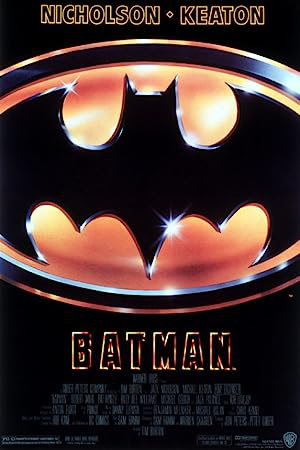

None
Batman


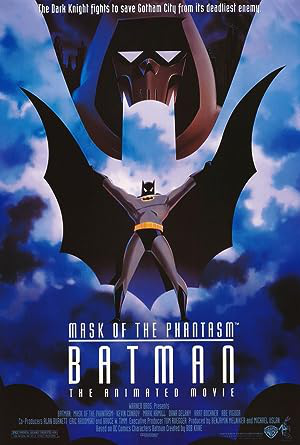

None
Batman: Mask of the Phantasm


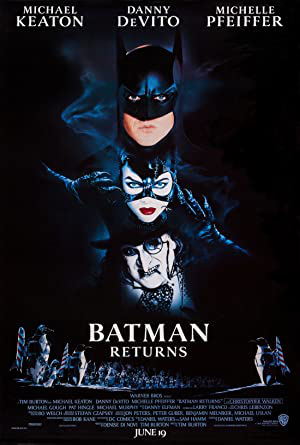

None
Batman Returns


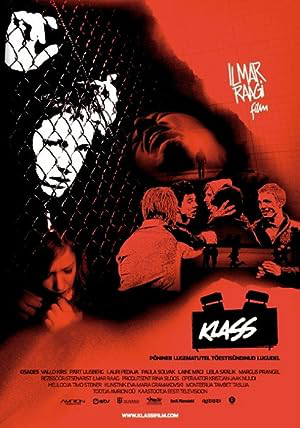

None
Class, The (Klass)


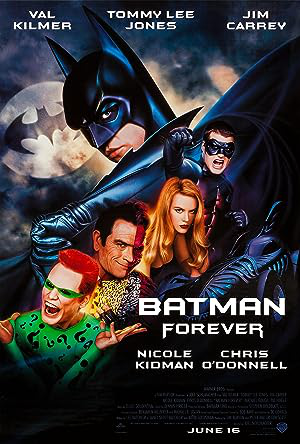

None
Batman Forever


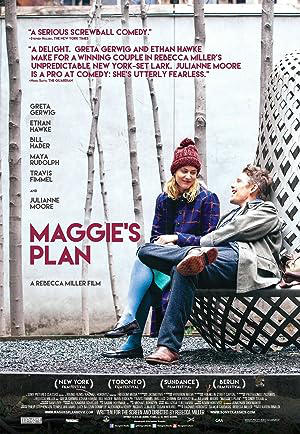

None
Maggie's Plan


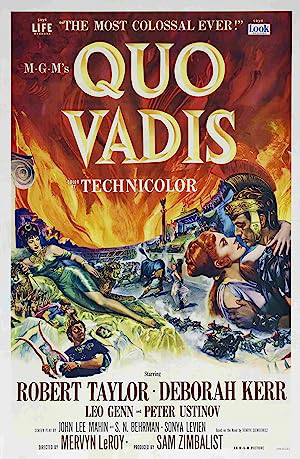

None
Quo Vadis


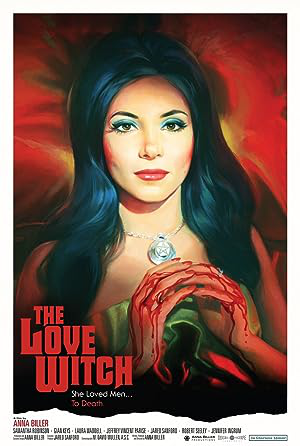

None
The Love Witch


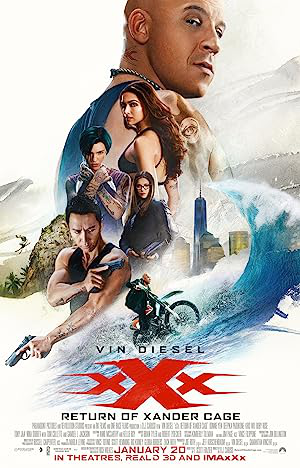

None
xXx: Return of Xander Cage


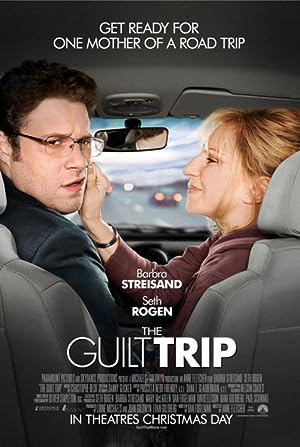

None
Guilt Trip, The


In [91]:
recommend('Batman')

### Taking the dataframe new_df and similarity for making website 

In [92]:
import pickle

In [93]:
new_df.head()

,movieId,title,imdbId,tags,AverageRate,api_imdbId
0,1,Toy Story,114709,Toy Story Adventure Animation Children Comedy ...,3.866106,tt0114709
1,2,Jumanji,113497,"Jumanji Adventure Children Fantasy Jumanji, on...",3.166612,tt0113497
2,3,Grumpier Old Men,113228,Grumpier Old Men Comedy Romance Things don't s...,3.024514,tt0113228
3,4,Waiting to Exhale,114885,Waiting to Exhale Comedy Drama Romance This st...,2.768927,tt0114885
4,5,Father of the Bride Part II,113041,Father of the Bride Part II Comedy In this seq...,2.932645,tt0113041


In [94]:
#Taking only those columns that are nececessary to fetch the recommended movies
final_df=new_df[['title','api_imdbId']]

In [95]:
final_df.head()

,title,api_imdbId
0,Toy Story,tt0114709
1,Jumanji,tt0113497
2,Grumpier Old Men,tt0113228
3,Waiting to Exhale,tt0114885
4,Father of the Bride Part II,tt0113041


In [96]:
# we convert the dataframe new_df into dictionary
pickle.dump(final_df.to_dict(),open('movies_dict.pkl','wb'))

In [97]:
pickle.dump(similarity,open('similarity.pkl','wb'))